<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

#Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2019.1

Professor: André Lage Freitas

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [1]:
using Pkg
Pkg.add("Distributed")
Pkg.add("StatsPlots")
using StatsPlots

function B_multicast(g,m,B_deliver)
    for p in g
        remotecall(B_deliver, p, m)
    end
end

using Distributed

# Adding 3 processes (workers)
addprocs(3)

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicast(g,"oi!",println)

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
      From worker 3:	oi!
      From worker 2:	oi!
      From worker 4:	oi!


### Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [2]:
using Pkg
Pkg.add("Distributed")

function B_multicast(g,m,B_deliver)
    for p in g
        remotecall(B_deliver, p, m)
    end
end

using Distributed

# Adding 10 processes (workers)
addprocs(10)

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicast(g,"oi!",println)

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 10:	oi!
      From worker 12:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 13:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 14:	oi!


Modifique a implementação do B-multicast para utilizar communicação síncrona.

In [3]:
# FUNÇÃO B-MULTICAST SÍNCRONA
function B_multicast_sync(g, m, B_deliver)
    for p in g
        remotecall_wait(B_deliver, p, m)
    end
end

B_multicast_sync (generic function with 1 method)

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

In [4]:
# COMPARAÇÃO ENTRE B-multicast síncrona (B_multicast_sync) e assíncrona (B_multicast)
addprocs(10)
g = workers()
B_multicast_sync(g, "Oi! Síncrona!", println)
B_multicast(g, "Oi! Assíncrona!", println)


      From worker 2:	Oi! Síncrona!
      From worker 3:	Oi! Síncrona!
      From worker 4:	Oi! Síncrona!
      From worker 5:	Oi! Síncrona!
      From worker 6:	Oi! Síncrona!
      From worker 7:	Oi! Síncrona!
      From worker 8:	Oi! Síncrona!
      From worker 9:	Oi! Síncrona!
      From worker 10:	Oi! Síncrona!
      From worker 11:	Oi! Síncrona!
      From worker 12:	Oi! Síncrona!
      From worker 13:	Oi! Síncrona!
      From worker 14:	Oi! Síncrona!
      From worker 15:	Oi! Síncrona!
      From worker 16:	Oi! Síncrona!
      From worker 17:	Oi! Síncrona!
      From worker 18:	Oi! Síncrona!
      From worker 19:	Oi! Síncrona!
      From worker 20:	Oi! Síncrona!
      From worker 21:	Oi! Síncrona!
      From worker 22:	Oi! Síncrona!
      From worker 23:	Oi! Síncrona!
      From worker 24:	Oi! Síncrona!
      From worker 2:	Oi! Assíncrona!
      From worker 6:	Oi! Assíncrona!
      From worker 9:	Oi! Assíncrona!
      From worker 12:	Oi! Assíncrona!
      From worker 3:	Oi! Assínc

A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _A ordem das mensagens na versões síncrona e assíncrona foram diferentes. Isso ocorre porque no modelo síncrono os processos de origem e destino são sincronizados a cada mensagem. As operações send e receive causam bloqueio, de modo que quando um send é feito, o processo de origem é bloqueado até que a recepção (receive) corresponde ocorra. Isso, inclusive, explica a sintonia no modelo síncrono. Já no modelo assíncrono essa sintonia não ocorre, havendo um atraso variável no trafego dos processos._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

In [7]:
# Medindo o tempo de execução nas duas versões - SÍNCRONA
#@time B_multicast_sync(g, "Oi! Síncrono!", println)
#@time B_multicast(g, "Oi! Assíncrono!", println)
@elapsed B_multicast_sync(g, "Oi! Síncrono!", println)

      From worker 2:	Oi! Síncrono!
      From worker 3:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 6:	Oi! Síncrono!
      From worker 7:	Oi! Síncrono!
      From worker 8:	Oi! Síncrono!
      From worker 9:	Oi! Síncrono!
      From worker 10:	Oi! Síncrono!
      From worker 11:	Oi! Síncrono!
      From worker 12:	Oi! Síncrono!
      From worker 13:	Oi! Síncrono!
      From worker 14:	Oi! Síncrono!
      From worker 15:	Oi! Síncrono!
      From worker 16:	Oi! Síncrono!
      From worker 17:	Oi! Síncrono!
      From worker 18:	Oi! Síncrono!
      From worker 19:	Oi! Síncrono!
      From worker 20:	Oi! Síncrono!
      From worker 21:	Oi! Síncrono!
      From worker 22:	Oi! Síncrono!
      From worker 23:	Oi! Síncrono!
      From worker 24:	Oi! Síncrono!


0.016974988

In [9]:
# Medindo o tempo de execução nas duas versões - ASSÍNCRONA
#@time B_multicast_sync(g, "Oi! Síncrono!", println)
#@time B_multicast(g, "Oi! Assíncrono!", println)
@elapsed B_multicast(g, "Oi! Assíncrono!", println)


      From worker 2:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!


0.016069352

      From worker 17:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!


* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

      From worker 2:	Oi! Síncrono!
      From worker 3:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 6:	Oi! Síncrono!
      From worker 7:	Oi! Síncrono!
      From worker 8:	Oi! Síncrono!
      From worker 9:	Oi! Síncrono!
      From worker 10:	Oi! Síncrono!
      From worker 11:	Oi! Síncrono!
      From worker 12:	Oi! Síncrono!
      From worker 13:	Oi! Síncrono!
      From worker 14:	Oi! Síncrono!
      From worker 15:	Oi! Síncrono!
      From worker 16:	Oi! Síncrono!
      From worker 17:	Oi! Síncrono!
      From worker 18:	Oi! Síncrono!
      From worker 19:	Oi! Síncrono!
      From worker 20:	Oi! Síncrono!
      From worker 21:	Oi! Síncrono!
      From worker 22:	Oi! Síncrono!
      From worker 23:	Oi! Síncrono!
      From worker 24:	Oi! Síncrono!
      From worker 2:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 4:	Oi! Assínc

      From worker 7:	Oi! Síncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 3:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 6:	Oi! Síncrono!
      From worker 10:	Oi! Síncrono!
      From worker 8:	Oi! Síncrono!
      From worker 9:	Oi! Síncrono!
      From worker 11:	Oi! Síncrono!
      From worker 12:	Oi! Síncrono!
      From worker 13:	Oi! Síncrono!
      From worker 14:	Oi! Síncrono!
      From worker 15:	Oi! Síncrono!
      From worker 16:	Oi! Síncrono!
      From worker 17:	Oi! Síncrono!
      From worker 18:	Oi! Síncrono!
      From worker 19:	Oi! Síncrono!
      From worker 20:	Oi! Síncrono!
      From worker 21:	Oi! Síncrono!
      From worker 22:	Oi! Síncrono!
      From worker 23:	Oi! Síncrono!
      From worker 24:	Oi! Síncrono!
      From worker 2:	Oi! Assíncrono!
      From worker 3:	Oi

      From worker 4:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 2:	Oi! Síncrono!
      From worker 3:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 6:	Oi! Síncro

      From worker 22:	Oi! Síncrono!
      From worker 23:	Oi! Síncrono!
      From worker 24:	Oi! Síncrono!
      From worker 2:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 2:	Oi! Síncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 4:	Oi! Síncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 20:	Oi! Assínc

      From worker 18:	Oi! Síncrono!
      From worker 19:	Oi! Síncrono!
      From worker 20:	Oi! Síncrono!
      From worker 21:	Oi! Síncrono!
      From worker 22:	Oi! Síncrono!
      From worker 23:	Oi! Síncrono!
      From worker 24:	Oi! Síncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 2:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 4:	Oi! Síncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncron

      From worker 20:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 2:	Oi! Síncrono!
      From worker 3:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 6:	Oi! Síncrono!
      From worker 7:	Oi! Síncrono!
      From worker 8:	Oi! Síncrono!
      From worker 9:	Oi! Síncrono!
      From worker 10:	Oi! Síncrono!
      

      From worker 12:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 3:	Oi! Síncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 6:	Oi! Síncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 2:	Oi! Síncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 7:	Oi! Síncrono

      From worker 7:	Oi! Assíncrono!
      From worker 10:	Oi! Assíncrono!
      From worker 8:	Oi! Assíncrono!
      From worker 6:	Oi! Assíncrono!
      From worker 3:	Oi! Assíncrono!
      From worker 4:	Oi! Assíncrono!
      From worker 5:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 12:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 22:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!
      From worker 24:	Oi! Assíncrono!
      From worker 2:	Oi! Síncrono!
      From worker 3:	Oi! Síncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 4:	Oi! Síncrono!
      From worker 5:	Oi! Síncrono!
      From worker 6:	Oi! Síncro

      From worker 22:	Oi! Assíncrono!


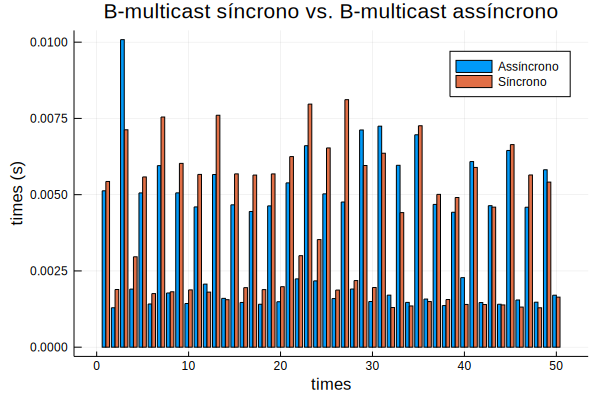

      From worker 24:	Oi! Assíncrono!
      From worker 7:	Oi! Assíncrono!
      From worker 9:	Oi! Assíncrono!
      From worker 11:	Oi! Assíncrono!
      From worker 13:	Oi! Assíncrono!
      From worker 14:	Oi! Assíncrono!
      From worker 15:	Oi! Assíncrono!
      From worker 16:	Oi! Assíncrono!
      From worker 17:	Oi! Assíncrono!
      From worker 19:	Oi! Assíncrono!
      From worker 18:	Oi! Assíncrono!
      From worker 20:	Oi! Assíncrono!
      From worker 21:	Oi! Assíncrono!
      From worker 23:	Oi! Assíncrono!


In [15]:
# Análise de desempenho do B-multicast
t_sync = t_async = []

times = 50

for i = 1:times
    #x_sync = @time B_multicast_sync(g, "Oi! Síncrono!", println)
    #x_async = @time B_multicast(g,"Oi! Assíncrono!", println)
    x_sync = @elapsed B_multicast_sync(g, "Oi! Síncrono!", println)
    x_async = @elapsed B_multicast(g,"Oi! Assíncrono!", println)
    push!(t_sync, float(x_sync))
    push!(t_async, float(x_async))
end

y_sync = convert(Array{Float64,1}, t_sync);
y_async = convert(Array{Float64,1}, t_async);

x_axis = repeat([i for i = 1:50], outer = 5)
y_axis = vcat(y_sync, y_async)
values = repeat(["Síncrono", "Assíncrono"], inner = 50)

groupedbar(x_axis, y_axis, group = values, 
    xlabel = "times", ylabel = "times (s)", 
    title = "B-multicast síncrono vs. B-multicast assíncrono")

**Gráfico**: _por aqui_ 

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _Na maioria dos casos a versão que teve menor tempo de execução foi a assíncrona. Isso ocorre porque na comunicação síncrona a sintonia das operações send e receive leva a um alto custo temporal, enquanto que na comunicação assíncrona isso não ocorre, tornando-as relativamente mais rápidas._



### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

* R-multicast síncrono

In [16]:
#TODO implementação do R-multicast síncrono.
#Função auxiliar do B_multicast
#receive_sync = Bool[]
receive_sync = Int[]
function B_multicast_sync_on_check(receive_sync, p, g, m, R_deliver)
    if !(p in receive_sync)
        push!(receive_sync, p)
        remotecall_wait(R_deliver,p, m)
        R_multicast_sync(g, m, R_deliver)
    end
end

function R_multicast_sync(g, m, R_deliver)
    for p in g
        B_multicast_sync_on_check(receive_sync, p, g, m, R_deliver)
    end
end

R_multicast_sync (generic function with 1 method)

* R-multicast assíncrono

In [17]:
#TODO implementação do R-multicast assíncrono.
#Função auxiliar do B_multicast
#receive_async = Bool[]
receive_async = Int[]
function B_multicast_async_on_check(receive_async, p, g, m, R_deliver)
    if !(p in receive_async)
        push!(receive_async, p)
        remotecall(R_deliver, p, m)
        R_multicast_async(g, m, R_deliver)
    end
end

function R_multicast_async(g, m, R_deliver)
    for p in g
        B_multicast_async_on_check(receive_async, p, g, m, R_deliver)
    end
end

R_multicast_async (generic function with 1 method)

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.


**Gráfico**: _por aqui_    
    
    
* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _O que teve menor tempo de execução foi o R-multicast assíncrono. Isso ocorre porque na comunicação síncrona a sintonia das operações send e receive leva a um alto custo temporal, enquanto que na comunicação assíncrona isso não ocorre, tornando-as relativamente mais rápidas. Valen ainda salientar que R-multicast assíncrono usa B-multicast assíncrono, além do que as comparações mostraram resultados análogos ao B-multicast nas formas síncronas e assíncronas._

_

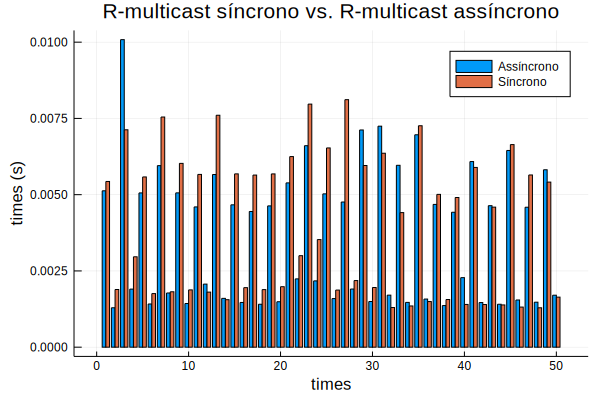

In [26]:
# Análise de desempenho do R-multicast
t_sync_R = t_async_R = []

times = 50

for i = 1:times
    #x_sync = @time B_multicast_sync(g, "Oi! Síncrono!", println)
    #x_async = @time B_multicast(g,"Oi! Assíncrono!", println)
    x_sync = @elapsed R_multicast_sync(g, "Oi! Síncrono R!", println)
    x_async = @elapsed R_multicast_async(g,"Oi! Assíncrono R!", println)
    push!(t_sync_R, float(x_sync))
    push!(t_async_R, float(x_async))
end

y_sync = convert(Array{Float64,1}, t_sync);
y_async = convert(Array{Float64,1}, t_async);

x_axis = repeat([i for i = 1:50], outer = 2)
y_axis = vcat(y_sync, y_async)
values = repeat(["Síncrono", "Assíncrono"], inner = 50)

groupedbar(x_axis, y_axis, group = values,
    xlabel = "times", ylabel = "times (s)",
    title = "R-multicast síncrono vs. R-multicast assíncrono")

### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _Com poucas exeções, o B-multicast assíncrono teve o menor tempo de execução em relação ao R-multicast assíncrono. Isso é esperado, por conta do número de threads executadas no R-multicast, que interfere no tempo de execução do multicast assíncrono, demandando mais tempo para as operações send e receive._    

_

      From worker 2:	Oi! Assíncrono B!
      From worker 5:	Oi! Assíncrono B!
      From worker 8:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 23:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 8:	Oi! Assíncrono B!
      From worker 6:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 12:	Oi! Assíncrono B!
      From worker 13:	Oi! Assíncrono B!
      From worker 14:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 18:	Oi! Assíncrono B!
      From worker 19:	Oi! Assíncrono B!
      From worker 21:	Oi! Assíncrono B!
      From worker 22:	Oi! Assíncrono B!
      From worker 24:	Oi! Assíncrono B!
      From worker 2:	Oi! Assíncrono B!
      From

      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 4:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 11:	Oi! Assíncrono B!
      From worker 

      From worker 6:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 9:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From worker 17:	Oi! Assíncrono B!
      From wo

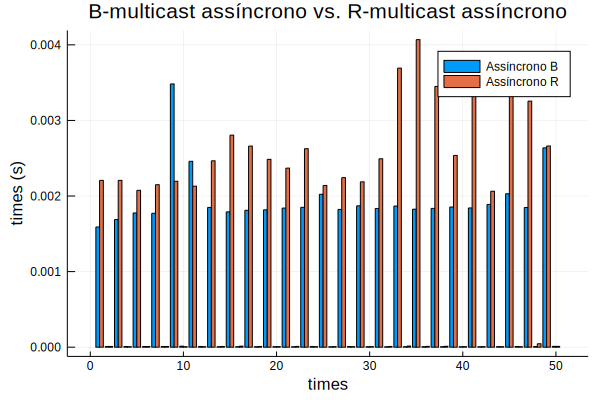

      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 10:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!
      From worker 20:	Oi! Assíncrono B!


      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 3:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 7:	Oi! Assíncrono B!
      From worker 4:	Oi! 

      From worker 8:	Oi! Assíncrono B!
      From worker 8:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 15:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
      From worker 16:	Oi! Assíncrono B!
  

In [32]:
# Análise de desempenho: B-multicast assíncrono vs. R-multicast assíncrono
t_async_B = t_async_R = []

times = 50

for i = 1:times
    #x_sync = @time B_multicast_sync(g, "Oi! Síncrono!", println)
    #x_async = @time B_multicast(g,"Oi! Assíncrono!", println)
    x_async_B = @elapsed B_multicast(g, "Oi! Assíncrono B!", println)
    x_async_R = @elapsed R_multicast_async(g,"Oi! Assíncrono R!", println)
    push!(t_async_B, float(x_async_B))
    push!(t_async_R, float(x_async_R))
end

y_async_B = convert(Array{Float64,1}, t_async_B);
y_async_R = convert(Array{Float64,1}, t_async_R);

x_axis = repeat([i for i = 1:50], outer = 2)
y_axis = vcat(y_async_B, y_async_R)
values = repeat(["Assíncrono B", "Assíncrono R"], inner = 50)

groupedbar(x_axis, y_axis, group = values,
        xlabel = "times", ylabel = "times (s)",
    title = "B-multicast assíncrono vs. R-multicast assíncrono")

* B-multicast síncrono vs. R-multicast síncrono.


**Resposta**: _Semelhante ao anterior, o B-multicast síncrono teve o menor tempo de execução em relação ao R-multicast síncrono. Isso é esperado, por conta do número de threads executadas no R-multicast, que interfere no tempo de execução do multicast síncrono, demandando mais tempo para as operações send e receive.Vale ainda saliendar que em nesses casos, a diferença não é expressiva, apesar de existir. Uma das possibilidades de explicação para isso seja o número relativamente baixo de execuções, que é de 50._  

In [1]:
# Análise de desempenho: B-multicast síncrono vs. R-multicast síncrono
t_sync_B = t_sync_R = []

times = 50

for i = 1:times
    #x_sync = @time B_multicast_sync(g, "Oi! Síncrono!", println)
    #x_async = @time B_multicast(g,"Oi! Assíncrono!", println)
    x_sync_B = @elapsed B_multicast_sync(g, "Oi! Síncrono B!", println)
    x_sync_R = @elapsed R_multicast_sync(g,"Oi! Síncrono R!", println)
    push!(t_sync_B, float(x_sync_B))
    push!(t_sync_R, float(x_sync_R))
end

y_sync_B = convert(Array{Float64,1}, t_sync_B);
y_sync_R = convert(Array{Float64,1}, t_sync_R);

x_axis = repeat([i for i = 1:50], outer = 2)
y_axis = vcat(y_sync_B, y_sync_R)
values = repeat(["Síncrono B", "Síncrono R"], inner = 50)

groupedbar(x_axis, y_axis, group = values,
        xlabel = "times", ylabel = "times (s)",
    title = "B-multicast síncrono vs. R-multicast síncrono")

UndefVarError: UndefVarError: B_multicast_sync not defined

Entrega
As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em Markdown e no formato IJulia Notebook.

O programa deve ser implementado na linguagem de programação Julia. Seu trabalho será testado na JuliaBox, portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.

Forma
O arquivo IJulia Notebook deverá ser entregue ao Professor exclusivamente através do Google Classroom.

A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

Prazos
O prazo de entrega sem atraso é o dia 18/11/17.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia 19/11/17. Serão descontados 5% da nota obtida por dia de atraso.

Pontuação extra
O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor.

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.

Plágio A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a cartilha sobre plágio.

Disclaimer
Esse material foi elaborado pelo Prof. André Lage Freitas e está licenciado sob a licença GNU General Public License v3.0.